In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

sns.set(style="ticks", color_codes=True)

In [2]:
df = pd.read_csv('data/fully_processed_data4.csv',index_col=0)

/Users/rubenstern/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#Here we are removing less than 10 lines that have very high price and force our plots to have very high range
df = df[df['price']<20000]

In [4]:
df.drop('zipcode',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)

In [5]:
df.shape

(1128145, 282)

In [6]:
income_columns = ['Households; Estimate; Less than $10,000',
       'Households; Estimate; $10,000 to $14,999',
       'Households; Estimate; $15,000 to $24,999',
       'Households; Estimate; $25,000 to $34,999',
       'Households; Estimate; $35,000 to $49,999',
       'Households; Estimate; $50,000 to $74,999',
       'Households; Estimate; $75,000 to $99,999',
       'Households; Estimate; $100,000 to $149,999',
       'Households; Estimate; $150,000 to $199,999',
       'Households; Estimate; $200,000 or more']

age_columns = ['Total; Estimate; Total population',
       'Total; Estimate; AGE - Under 5 years',
       'Total; Estimate; AGE - 5 to 9 years',
       'Total; Estimate; AGE - 10 to 14 years',
       'Total; Estimate; AGE - 15 to 19 years',
       'Total; Estimate; AGE - 20 to 24 years',
       'Total; Estimate; AGE - 25 to 29 years',
       'Total; Estimate; AGE - 30 to 34 years',
       'Total; Estimate; AGE - 35 to 39 years',
       'Total; Estimate; AGE - 40 to 44 years',
       'Total; Estimate; AGE - 45 to 49 years',
       'Total; Estimate; AGE - 50 to 54 years',
       'Total; Estimate; AGE - 55 to 59 years',
       'Total; Estimate; AGE - 60 to 64 years',
       'Total; Estimate; AGE - 65 to 69 years',
       'Total; Estimate; AGE - 70 to 74 years',
       'Total; Estimate; AGE - 75 to 79 years',
       'Total; Estimate; AGE - 80 to 84 years',
       'Total; Estimate; AGE - 85 years and over']

date_columns = ['month', 'year', 'day',
       'week', 'weekday', 'is_holiday']

state_columns = ['state: CA', 'state: CO', 'state: DC',
       'state: IL', 'state: LA', 'state: MA', 'state: MD', 'state: MP',
       'state: NC', 'state: NY', 'state: OR', 'state: TN', 'state: TX',
       'state: WA']

room_type_columns = ['room_type: Entire home/apt', 'room_type: Private room',
       'room_type: Shared room']

reviews_columns = ['number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location','review_scores_rating']

house_features_columns = ['accommodates','availability_30','bathrooms','bedrooms','beds']

In [7]:
df['income: less than 15k'] = df['Households; Estimate; Less than $10,000'].astype(float) +\
                             df['Households; Estimate; $10,000 to $14,999'].astype(float)
df['income: 15k to 35k'] = df['Households; Estimate; $15,000 to $24,999'].astype(float) +\
                              df['Households; Estimate; $25,000 to $34,999'].astype(float)
df['income: 35k to 75k'] = df['Households; Estimate; $35,000 to $49,999'].astype(float) +\
                              df['Households; Estimate; $50,000 to $74,999'].astype(float)
df['income: 75k to 150k'] = df['Households; Estimate; $75,000 to $99,999'].astype(float) +\
                              df['Households; Estimate; $100,000 to $149,999'].astype(float)
df['income: more than 150k'] = df['Households; Estimate; $150,000 to $199,999'].astype(float) +\
                              df['Households; Estimate; $200,000 or more'].astype(float)
      
reduced_income_columns = ['income: less than 15k','income: 15k to 35k','income: 35k to 75k',
                         'income: 75k to 150k','income: more than 150k']

df['age: under 14'] = df['Total; Estimate; AGE - Under 5 years'].astype(float) + \
     df['Total; Estimate; AGE - 5 to 9 years'].astype(float) + \
     df['Total; Estimate; AGE - 10 to 14 years'].astype(float)

df['age: 15 to 29'] = df['Total; Estimate; AGE - 15 to 19 years'].astype(float) + \
     df['Total; Estimate; AGE - 20 to 24 years'].astype(float) + \
     df['Total; Estimate; AGE - 25 to 29 years'].astype(float)      
        
df['age: 30 to 44'] = df['Total; Estimate; AGE - 30 to 34 years'].astype(float) + \
     df['Total; Estimate; AGE - 35 to 39 years'].astype(float) + \
     df['Total; Estimate; AGE - 40 to 44 years'].astype(float)
        
df['age: 45 to 59'] = df['Total; Estimate; AGE - 45 to 49 years'].astype(float) + \
     df['Total; Estimate; AGE - 50 to 54 years'].astype(float) + \
     df['Total; Estimate; AGE - 55 to 59 years'].astype(float)
        
df['age: 60 to 74'] = df['Total; Estimate; AGE - 60 to 64 years'].astype(float) + \
     df['Total; Estimate; AGE - 65 to 69 years'].astype(float) + \
     df['Total; Estimate; AGE - 70 to 74 years'].astype(float)
        
df['age: more than 75'] = df['Total; Estimate; AGE - 75 to 79 years'].astype(float) + \
     df['Total; Estimate; AGE - 80 to 84 years'].astype(float) + \
     df['Total; Estimate; AGE - 85 years and over'].astype(float)
        
reduced_age_columns = ['age: under 14','age: 15 to 29','age: 30 to 44',
                      'age: 45 to 59','age: 60 to 74','age: more than 75','Total; Estimate; Total population']

<h2>Price Distribution</h2>

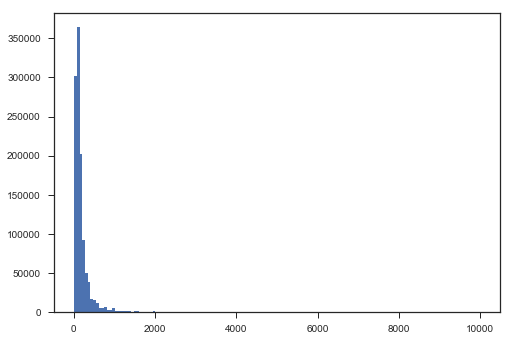

In [8]:
plt.hist(df['price'],bins=150)
plt.show()

<h2>Pearson correlation</h2>

In [9]:
def print_pearson_corr(columns_list):
    corr = df[columns_list].corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

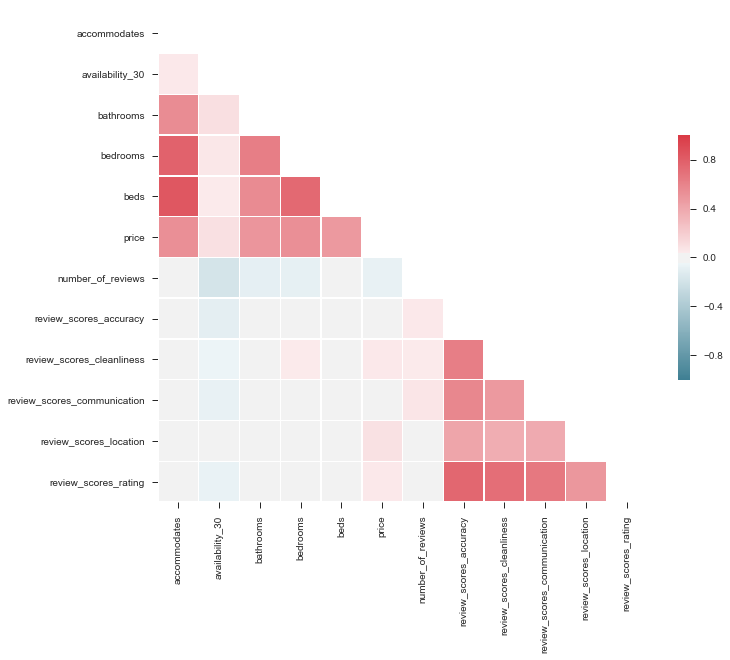

In [10]:
print_pearson_corr(house_features_columns+['price']+reviews_columns)

<h2>Pairplots</h2>

In [11]:
def print_pairplot_distribution(columns_list):
    g = sns.PairGrid(df[columns_list])
    g = g.map_diag(plt.hist)
    g = g.map_offdiag(plt.scatter)
    plt.show()

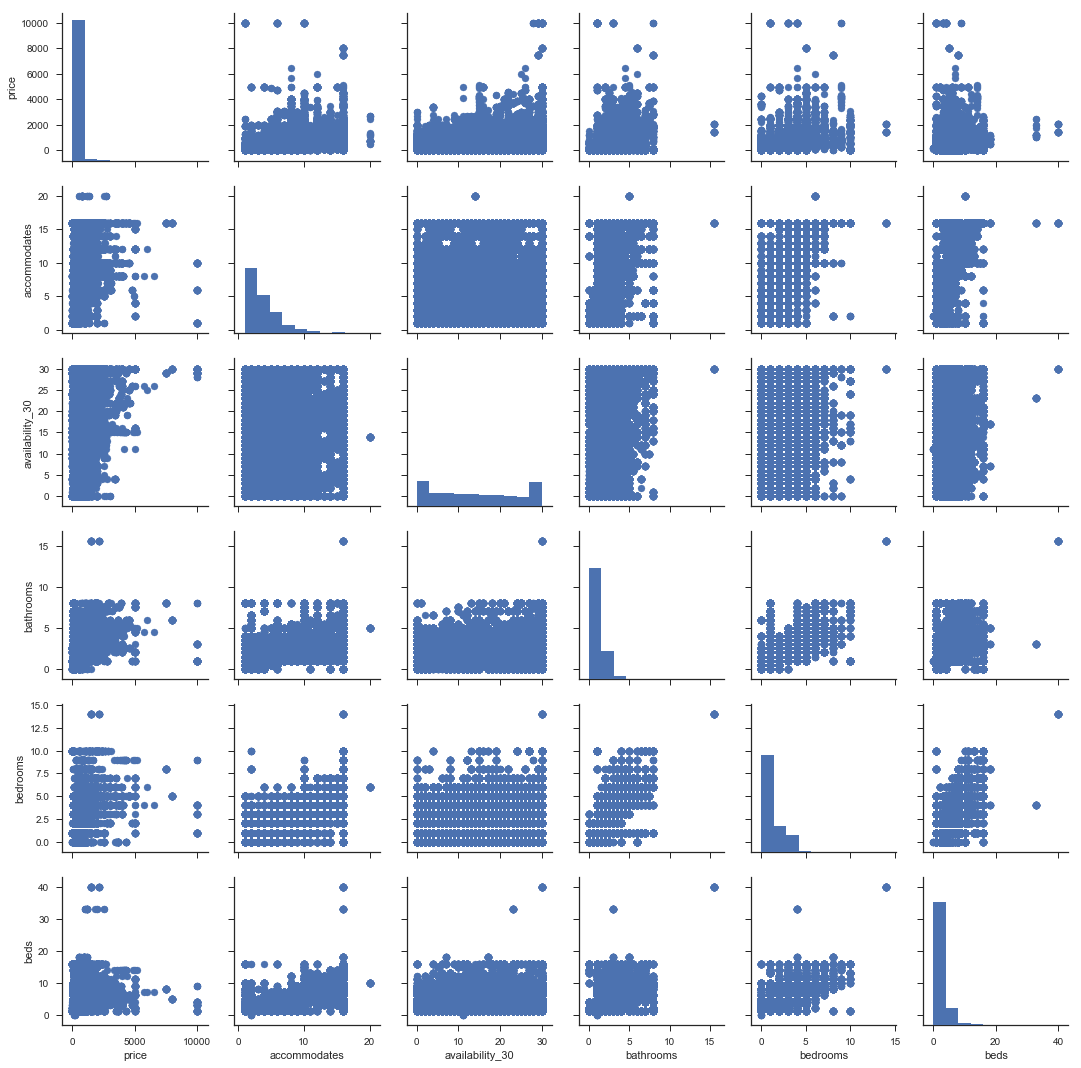

In [12]:
print_pairplot_distribution(['price']+house_features_columns)

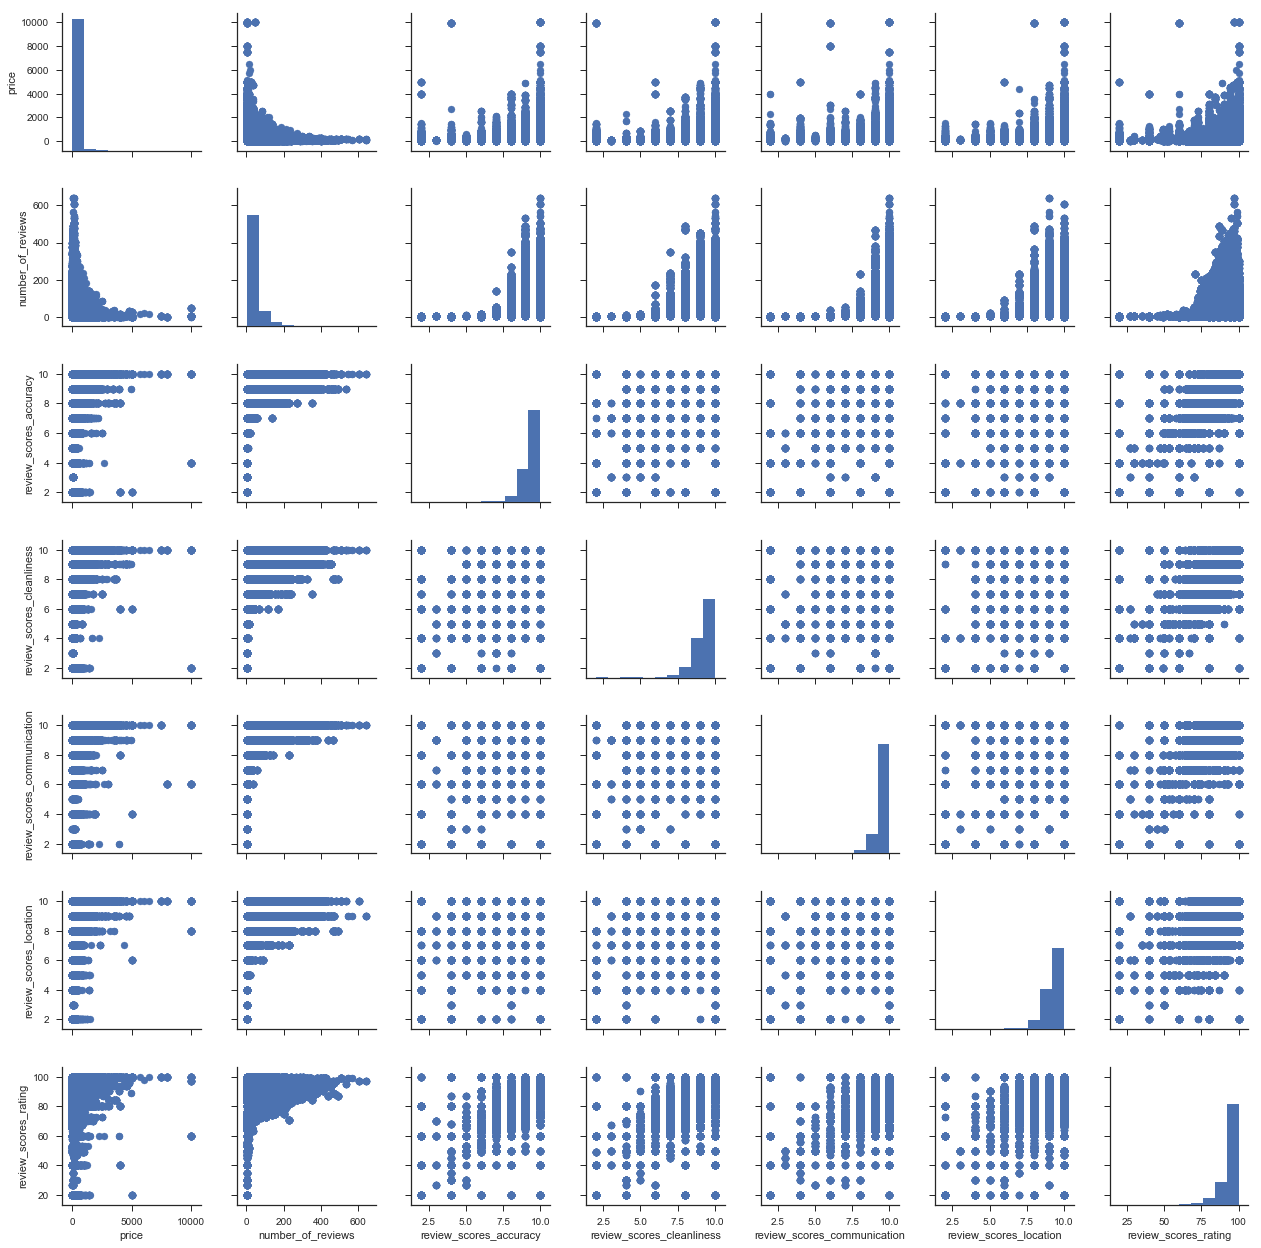

In [13]:
print_pairplot_distribution(['price']+reviews_columns)

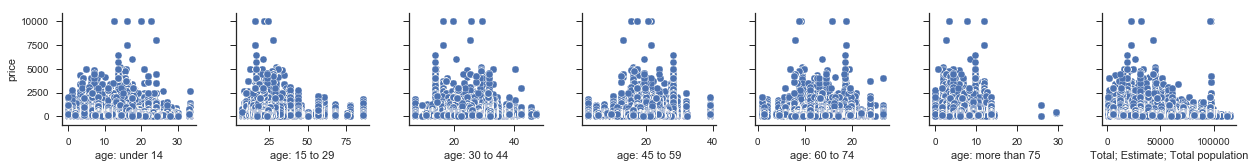

In [14]:
pp = sns.pairplot(data=df,y_vars=['price'],x_vars=reduced_age_columns)
plt.show()

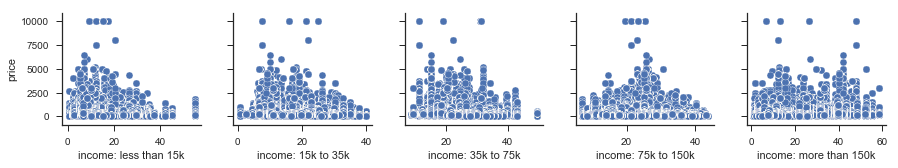

In [15]:
pp = sns.pairplot(data=df,y_vars=['price'],x_vars=reduced_income_columns)
plt.show()

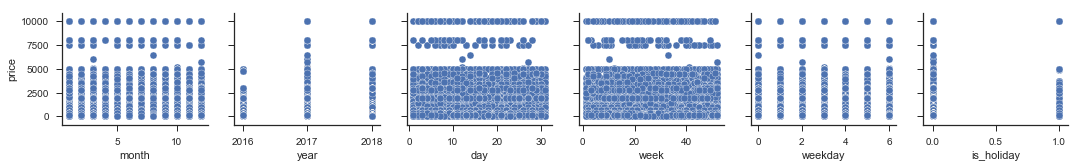

In [16]:
pp = sns.pairplot(data=df,y_vars=['price'],x_vars=date_columns)
plt.show()

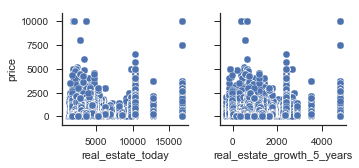

In [19]:
pp = sns.pairplot(data=df,y_vars=['price'],x_vars=['real_estate_today','real_estate_growth_5_years'])
plt.show()